<a href="https://colab.research.google.com/github/anushkaa-10/Deep-learning/blob/main/Malaria_Diagnosis-Lessaccuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, InputLayer, BatchNormalization, Input
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

In [ ]:
dataset,dataset_info = tfds.load('malaria', with_info = True, as_supervised=True, shuffle_files=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

In [ ]:
dataset

In [ ]:
dataset_info

In [31]:
for data in dataset['train'].take(1):
  print(data)

(<tf.Tensor: shape=(103, 103, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)>, <tf.Tensor: shape=(), dtype=int64, numpy=1>)


In [32]:
def splits(dataset, TRAIN_RATIO, VAL_RATIO, TEST_RATIO):
  DATSET_SIZE = len(dataset)

  train_dataset = dataset.take(int(DATSET_SIZE*TRAIN_RATIO))

  val_test = dataset.skip(int(DATSET_SIZE*TRAIN_RATIO))
  val_dataset = val_test.take(int(DATSET_SIZE*VAL_RATIO))

  test_dataset = val_test.skip(int(DATSET_SIZE*VAL_RATIO))
  return train_dataset, val_dataset, test_dataset

In [33]:
TRAIN_RATIO =0.8
VAL_RATIO =0.1
TEST_RATIO =0.1

#dataset = tf.data.Dataset.range(10)

train_dataset, val_dataset, test_dataset = splits(dataset['train'], TRAIN_RATIO, VAL_RATIO, TEST_RATIO)
print(list(train_dataset.take(1).as_numpy_iterator()), list(val_dataset.take(1).as_numpy_iterator()), list(test_dataset.take(1).as_numpy_iterator()))

[(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8), 1)] [(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
     

**DATA VISUALISATION**

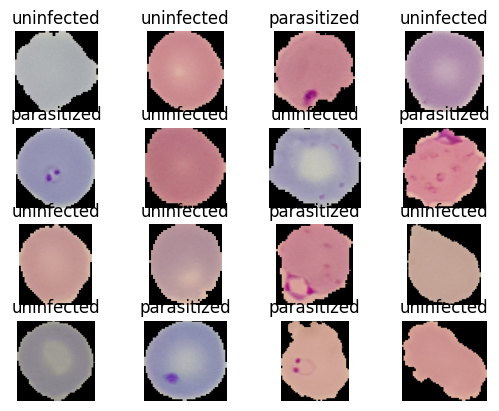

In [34]:
for i, (image, label) in enumerate(train_dataset.take(16)):
  ax = plt.subplot(4,4,i+1)
  plt.imshow(image)
  plt.title(dataset_info.features['label'].int2str(label))
  plt.axis('off')

**DATA PROCESSING**

In [35]:
IM_SIZE = 224
def resize_rescale(image,label):
  return tf.image.resize(image,(IM_SIZE, IM_SIZE))/255,label

In [36]:
train_dataset = train_dataset.map(resize_rescale)
val_dataset = val_dataset.map(resize_rescale)
test_dataset = test_dataset.map(resize_rescale)

In [37]:
for image,label in train_dataset.take(1):
  print(image,label)

tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(224, 224, 3), dtype=float32) tf.Tensor(1, shape=(), dtype=int64)


In [38]:
train_dataset = train_dataset.shuffle(buffer_size=8,reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)

In [39]:
val_dataset = val_dataset.shuffle(buffer_size=8,reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)

In [40]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [41]:
val_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

**MODEL CREATION**

Sequential API

In [26]:
model = tf.keras.Sequential([
                             InputLayer(input_shape=(IM_SIZE,IM_SIZE,3)),

                             Conv2D(filters=6, kernel_size=5,strides=1, padding ='valid', activation='relu'),
                             BatchNormalization(),
                             MaxPool2D(pool_size=2, strides=2),

                             Conv2D(filters=16, kernel_size=5,strides=1, padding ='valid', activation='relu'),
                             BatchNormalization(),
                             MaxPool2D(pool_size=2, strides=2),

                             Flatten(),

                             Dense(100, activation='relu'),
                             BatchNormalization(),
                             Dense(10, activation='relu'),
                             BatchNormalization(),
                             Dense(1, activation='sigmoid'),
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 220, 220, 6)       456       
                                                                 
 batch_normalization_8 (Bat  (None, 220, 220, 6)       24        
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 110, 110, 6)       0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 106, 106, 16)      2416      
                                                                 
 batch_normalization_9 (Bat  (None, 106, 106, 16)      64        
 chNormalization)                                                
                                                      

Functional API

In [42]:
func_input = Input(shape =(IM_SIZE,IM_SIZE,3), name = 'Lenet Model' )

x= Conv2D(filters=6, kernel_size=5,strides=1, padding ='valid', activation='relu')(func_input)
x= BatchNormalization()(x)
x= MaxPool2D(pool_size=2, strides=2)(x)
x= Conv2D(filters=16, kernel_size=5,strides=1, padding ='valid', activation='relu')(x)
x=BatchNormalization()(x)
x= MaxPool2D(pool_size=2, strides=2)(x)

x=Flatten()(x)

x = Dense(100, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(10, activation='relu')(x)
x = BatchNormalization()(x)

func_output= Dense(1, activation='sigmoid')(x)

lenet_model = Model(func_input,func_output, name = "Lenet_Model")
lenet_model.summary()

Model: "Lenet_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Lenet Model (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_8 (Conv2D)           (None, 220, 220, 6)       456       
                                                                 
 batch_normalization_16 (Ba  (None, 220, 220, 6)       24        
 tchNormalization)                                               
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 110, 110, 6)       0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 106, 106, 16)      2416      
                                                                 
 batch_normalization_17 (Ba  (None, 106, 106, 16)      

# Model SubClassing

In [ ]:
class FeatureExtractor(Layer):
  def __init__(self):
    super(FeatureExtractor,self).__init__()

    self.conv_1 = Conv2D(filters=6, kernel_size=3,strides=1, padding ='valid', activation='relu')
    self.batch_1 = BatchNormalization()
    self.pool_1 = MaxPool2D(pool_size=2, strides=2)

    self.conv_2 = Conv2D(filters=16, kernel_size=3,strides=1, padding ='valid', activation='relu')
    self.batch_2 = BatchNormalization()
    self.pool_2 = MaxPool2D(pool_size=2, strides=2)



  def call(self,x,training):
    x = self.conv_1(x)
    x = self.batch_1(x)
    x = self.pool_1(x)

    x= self.conv_2(x)
    x = self.batch_2(x)
    x = self.pool_2(x)

    return x

# Model Training

In [43]:
lenet_model.compile(
    optimizer=Adam(learning_rate=0.01),
    loss=BinaryCrossentropy(),
    metrics = 'accuracy',
)

In [44]:
history=lenet_model.fit(train_dataset,validation_data=val_dataset,epochs=75,verbose=1)

Epoch 1/75
689/689 [==============================] - 50s 62ms/step - loss: 0.5873 - accuracy: 0.6761 - val_loss: 0.8162 - val_accuracy: 0.4947
Epoch 2/75
689/689 [==============================] - 42s 61ms/step - loss: 0.6581 - accuracy: 0.6107 - val_loss: 0.7597 - val_accuracy: 0.6185
Epoch 3/75
689/689 [==============================] - 43s 62ms/step - loss: 0.6412 - accuracy: 0.6322 - val_loss: 3.6419 - val_accuracy: 0.5089
Epoch 4/75
689/689 [==============================] - 42s 61ms/step - loss: 0.6369 - accuracy: 0.6337 - val_loss: 0.6836 - val_accuracy: 0.6316
Epoch 5/75
689/689 [==============================] - 42s 61ms/step - loss: 0.6188 - accuracy: 0.6593 - val_loss: 0.8364 - val_accuracy: 0.5347
Epoch 6/75
689/689 [==============================] - 50s 72ms/step - loss: 0.6023 - accuracy: 0.6742 - val_loss: 0.7187 - val_accuracy: 0.6083
Epoch 7/75
689/689 [==============================] - 42s 61ms/step - loss: 0.5879 - accuracy: 0.6899 - val_loss: 0.7043 - val_accuracy:

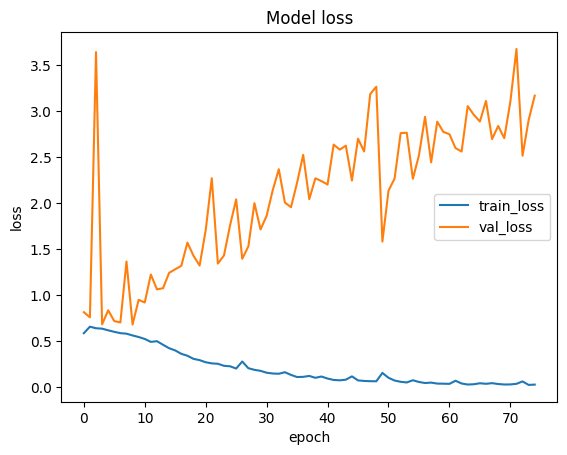

In [45]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

#MODEL EVALUATION AND TESTING




In [46]:
test_dataset = test_dataset.batch(1)

In [47]:
lenet_model.evaluate(test_dataset)

2757/2757 [==============================] - 19s 3ms/step - loss: 3.4491 - accuracy: 0.5985


[3.449068546295166, 0.5984765887260437]

In [48]:
def parasite_or_not(x):
  if(x<0.5):
    return str('P')

  else:
    return str('U')

In [49]:
parasite_or_not(model.predict(test_dataset.take(1))[0][0])

1/1 [==============================] - 11s 11s/step


'U'

1/1 [==============================] - 0s 17ms/step


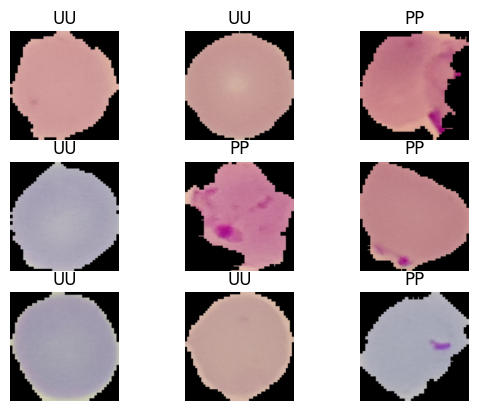

In [ ]:
for i, (image,label) in enumerate(test_dataset.take(9)):

  ax = plt.subplot(3,3,i+1)
  plt.imshow(image[0])
  plt.title(str(parasite_or_not(label.numpy()[0]))+ str(parasite_or_not(model.predict(image)[0][0])))
  plt.axis('off')

# Model Saving

In [ ]:
import pickle

In [ ]:
pickle.dump(model,open('model.pkl','wb'))

In [ ]:
model_load = pickle.load(open('model.pkl','rb'))